# Modul 2 Lab Based Education KCV 2024
## Unsupervised Learning

<img src="./assets/title.webp" alt="title" width="800" height="300">

### Definisi
Model machine learning yang dilatih dengan data **tanpa** menggunakan label.

Yang dilakukan model adalah **mempelajari pola dari data**


### Apa saja tipe unsupervised learning

**Clustering**

<img src="./assets/clustering.webp" alt="clustering" width="800" height="400">

**Dimensionality Reduction**

![DR](./assets/DR.gif)

## CLUSTERING

Clustering adalah proses mengelompokkan data (objek) ke dalam kelompok-kelompok yang disebut **cluster**. Cluster dikelompokkan berdasarkan **kemiripan** antar objek.

**Kemiripan diukur dari jarak antar data**

Tujuan utama analisis cluster adalah:
- Meminimalkan Intra Cluster
- Memaksimalkan Inter-Cluster

<img src="./assets/tujuan_cluster.png" alt="tujuan_cluster" width="800" height="300">


### PRASYARAT!!!

Nah karena kita akan mencari kemiripan antar data dengan jaraknya, kita harus mengetahui cara untuk menghitung jaraknya. Ada beberapa rumus jarak yang bisa dipakai:

1. Manhattan Distance
2. Euclidean Distance
3. Minkowski Distance

![distance_1](./assets/distance_1.png)

![distance_2](./assets/distance_2.png)

### K-Means Clustering

K-Means clustering adalah algoritma yang mengelompokkan **N data** (berdasarkan fitur / atribut) ke dalam **K cluster**. Sebuah cluster di K-Means berpusat pada sebuah **titik centroid**. Selain K-Means, ada juga K-Medians dan [K-Medoids](https://esairina.medium.com/clustering-menggunakan-algoritma-k-medoids-67179a333723).

![example_1](./assets/example_1.png)

**Bagaimana K-Means Bekerja???**

![kmeans_1](./assets/kmeans_1.png)

### [Coding Time] K-Means Clustering

Kali ini, kita akan bereksperimen menggunakan dataset karakter dari game [Genshin Impact](https://genshin.hoyoverse.com/). Tujuan clustering kali ini adalah untuk mengelompokkan karakter berdasarkan `base ATK`, `base HP`, dan `base DEF` pada level 90

In [2]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
df = pd.read_csv('./Dataset/Genshin_Data.csv')
df

,character_name,rarity,region,vision,weapon_type,hp_90_90,atk_90_90,def_90_90
0,Albedo,5,Mondstadt,Geo,Sword,13226,251,876
1,Alhaitham,5,Sumeru,Dendro,Sword,13348,313,781
2,Aloy,5,Unknown,Cryo,Bow,10899,234,676
3,Amber,4,Mondstadt,Pyro,Bow,9461,223,601
4,Arataki Itto,5,Inazuma,Geo,Claymore,12858,227,959
...,...,...,...,...,...,...,...,...
79,Yaoyao,4,Liyue,Dendro,Polearm,12288,212,750
80,Yelan,5,Liyue,Hydro,Bow,14450,244,548
81,Yoimiya,5,Inazuma,Pyro,Bow,10164,323,615
82,Yun Jin,4,Liyue,Geo,Polearm,10657,191,734


In [4]:
# Kita coba eksplorasi data terlebih dahulu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   character_name                84 non-null     object
 1    rarity                       84 non-null     int64 
 2    region                       84 non-null     object
 3    vision                       84 non-null     object
 4    weapon_type                  84 non-null     object
 5    hp_90_90                     84 non-null     int64 
 6    atk_90_90                    84 non-null     int64 
 7    def_90_90                    84 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 5.4+ KB


In [5]:
df.describe()

,rarity,hp_90_90,atk_90_90,def_90_90
count,84.000000,84.000000,84.000000,84.000000
mean,4.559524,11726.047619,244.178571,698.297619
std,0.499426,1645.152792,50.754348,91.541126
min,4.000000,9189.000000,106.000000,499.000000
25%,4.000000,10500.500000,212.000000,630.000000
50%,5.000000,11146.500000,230.000000,683.000000
75%,5.000000,12925.500000,287.000000,759.250000
max,5.000000,15674.000000,349.000000,959.000000


In [6]:
# Buat merapikan nama kolom / fitur
df.columns = df.columns.str.strip()

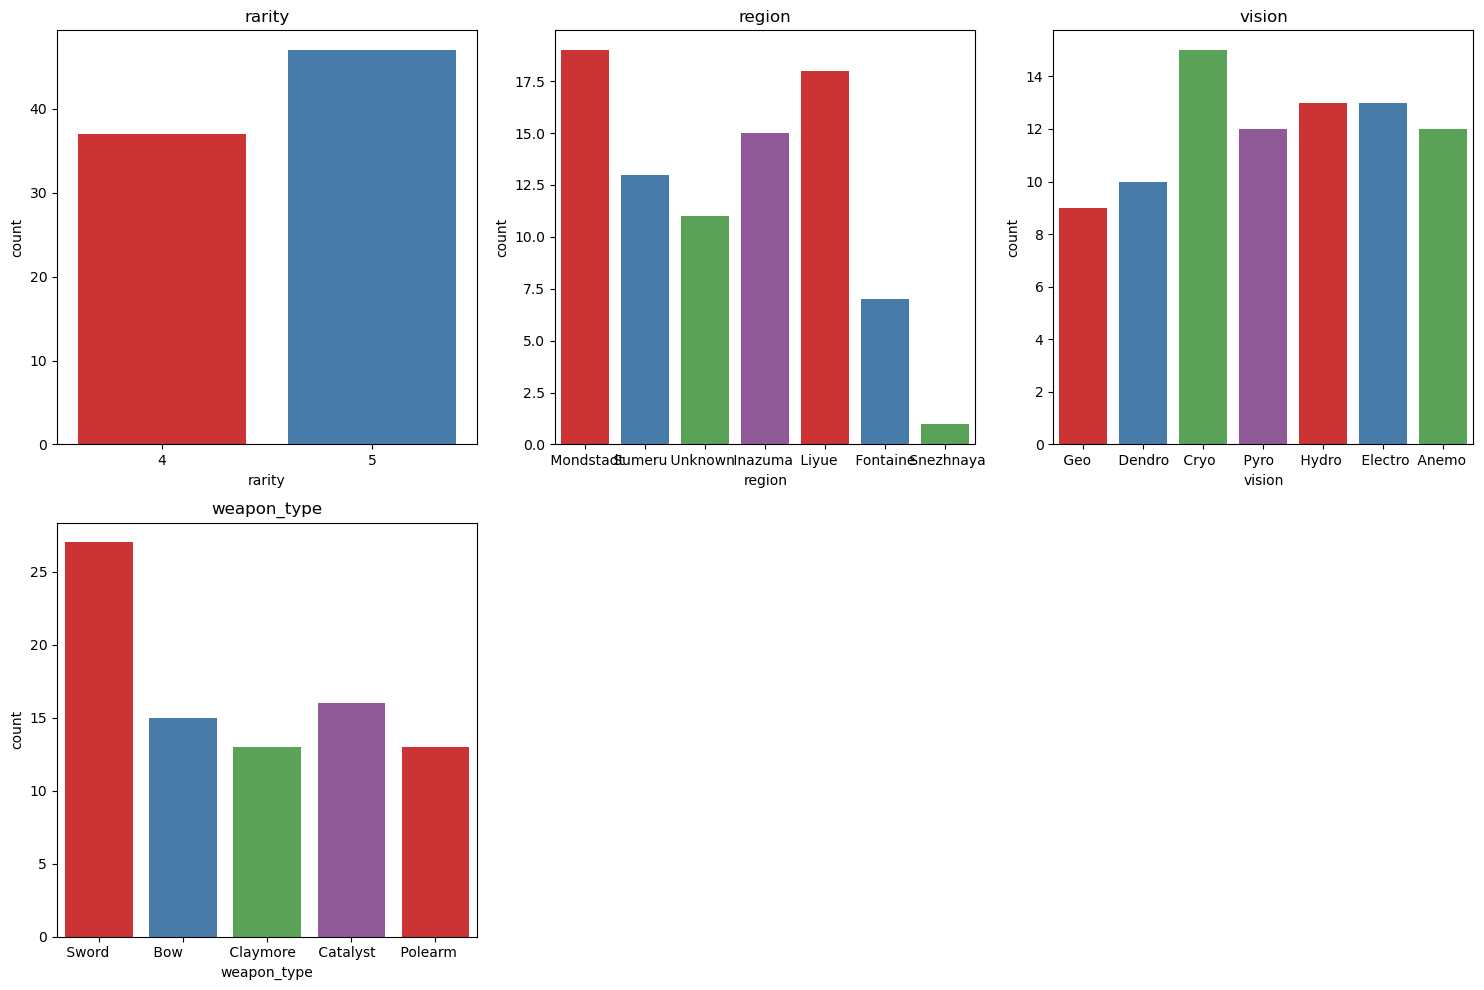

In [7]:
# Kita coba visualisasi data pada kolom 'rarity', 'region', 'vision', 'weapon_type'

kolom_1 = ['rarity', 'region', 'vision', 'weapon_type']

color_palette = sns.color_palette("Set1", len(kolom_1))

plt.figure(figsize=(15, 10))
for i, column in enumerate(kolom_1, 1):
    plt.subplot((len(kolom_1)//3)+1, 3, i)
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()

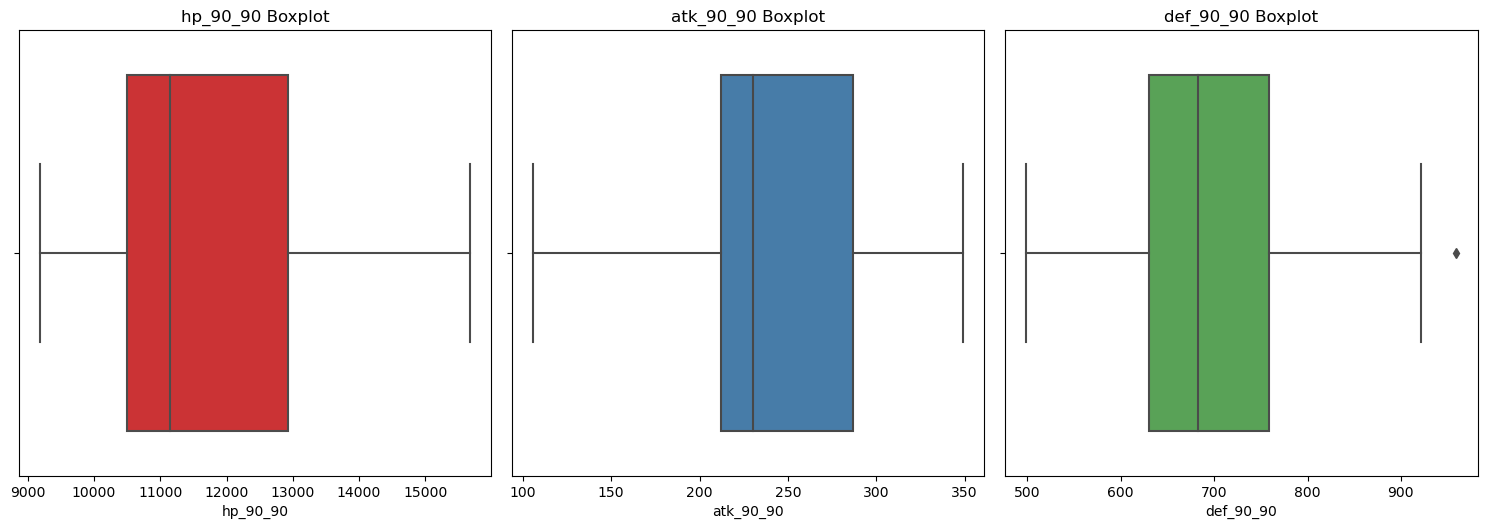

In [8]:
# Sekarang kita coba visualisasi data HP, ATK, dan DEF (Menggunakan Box Plot)

kolom_2 = ['hp_90_90', 'atk_90_90', 'def_90_90']

color_palette = sns.color_palette("Set1", len(kolom_2))
plt.figure(figsize = (15, 10))

for i, column in enumerate(kolom_2, 1):
    plt.subplot((len(kolom_2)//3)+1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

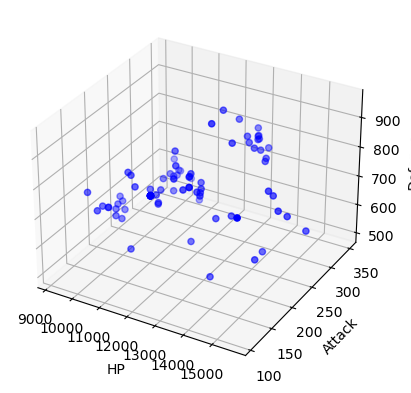

In [9]:
# Kita coba visualisasi secara 3d antara HP, ATK, dan DEF

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (20, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['hp_90_90']
y = df['atk_90_90']
z = df['def_90_90']

ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('HP')
ax.set_ylabel('Attack')
ax.set_zlabel('Defense')

plt.ion()
plt.show()

In [10]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['hp_90_90'],
    y=df['atk_90_90'],
    z=df['def_90_90'],
    mode='markers'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='HP',
        yaxis_title='Attack',
        zaxis_title='Defense'
    )
)

fig.show()
# Selanjutnya, kita hanya akan menggunakan data dengan kolom_2

df_train = df[kolom_2]
df_train

,hp_90_90,atk_90_90,def_90_90
0,13226,251,876
1,13348,313,781
2,10899,234,676
3,9461,223,601
4,12858,227,959
...,...,...,...
79,12288,212,750
80,14450,244,548
81,10164,323,615
82,10657,191,734


In [11]:
# Sekarang kita coba clustering data menggunakan KMeans
# Tapi sebelum itu, kita tentukan nilai K yang paling optimum dengan Elbow Method dan Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_train)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_train, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [61508946.17045454]
silhoutte score for n_clusters = 2 is 0.6482207442032046
wcss score for n_cluster = 3 is [61508946.17045454, 27158052.338442564]
silhoutte score for n_clusters = 3 is 0.6709925097075251
wcss score for n_cluster = 4 is [61508946.17045454, 27158052.338442564, 14560289.459554596]
silhoutte score for n_clusters = 4 is 0.6379848887077988
wcss score for n_cluster = 5 is [61508946.17045454, 27158052.338442564, 14560289.459554596, 7153260.622759103]
silhoutte score for n_clusters = 5 is 0.652383862458625
wcss score for n_cluster = 6 is [61508946.17045454, 27158052.338442564, 14560289.459554596, 7153260.622759103, 5086679.633259714]
silhoutte score for n_clusters = 6 is 0.6621538257987974
wcss score for n_cluster = 7 is [61508946.17045454, 27158052.338442564, 14560289.459554596, 7153260.622759103, 5086679.633259714, 3808935.8832597146]
silhoutte score for n_clusters = 7 is 0.6554322709707177
wcss score for n_cluster = 8 is [61508946.17045454, 

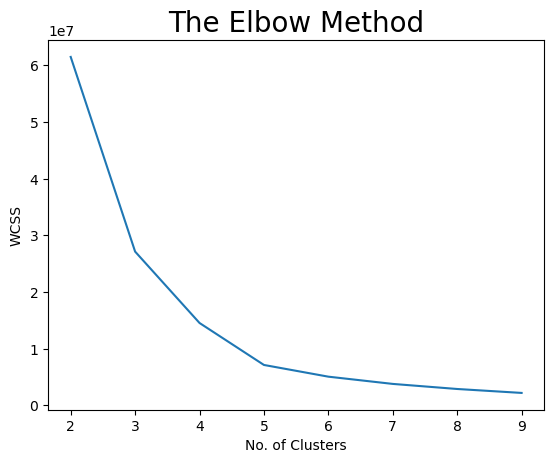

In [12]:
# Visualisasi Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

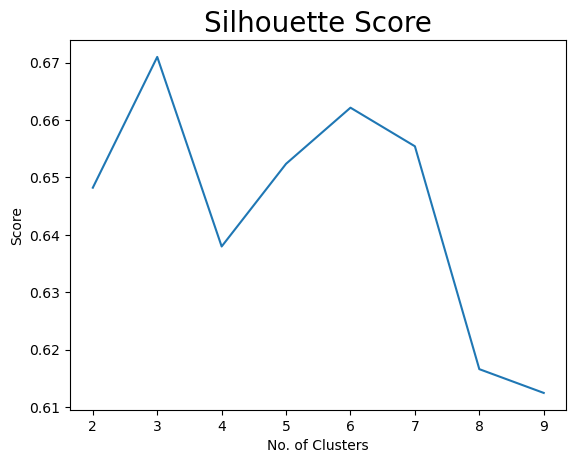

In [13]:
# Visualisasi Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [14]:
# Dari Elbow Method dan Sillhouette Score, kita akan menggunakan K = 3
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(df_train)

In [15]:
# SEKARANG KITA VISUALISASIKAN

# Membuat scatter plot 3D untuk setiap cluster dengan plotly
trace1 = go.Scatter3d(
    x=df_train[y_kmeans == 0].iloc[:, 0],
    y=df_train[y_kmeans == 0].iloc[:, 1],
    z=df_train[y_kmeans == 0].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Cluster 1'
)

trace2 = go.Scatter3d(
    x=df_train[y_kmeans == 1].iloc[:, 0],
    y=df_train[y_kmeans == 1].iloc[:, 1],
    z=df_train[y_kmeans == 1].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=df_train[y_kmeans == 2].iloc[:, 0],
    y=df_train[y_kmeans == 2].iloc[:, 1],
    z=df_train[y_kmeans == 2].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='HP',
        yaxis_title='ATK',
        zaxis_title='DEF'
    ),
    showlegend=True
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()

### Hierarchical Clustering

**Definisi** = Algoritma yang menghasilkan cluster dengan cara menyusunnya seperti pohon hirarki

![HC](./assets/HC.png)

**Jenis Hierarchical Clustering**:
1. Agglomerative (Bottom-Up)
2. Divisive (Top-Down)

### [Coding Time] Hierarchical Clustering


In [16]:
from sklearn.cluster import AgglomerativeClustering

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_train)

        labels = AC.labels_
        silhouette_avg = silhouette_score(df_train, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.6464335726985453
silhoutte score for n_clusters = 3 is 0.6709925097075251
silhoutte score for n_clusters = 4 is 0.6492459732393346
silhoutte score for n_clusters = 5 is 0.6603480046010003
silhoutte score for n_clusters = 6 is 0.6535979368815843
silhoutte score for n_clusters = 7 is 0.6468763820535044
silhoutte score for n_clusters = 8 is 0.5821622085156519
silhoutte score for n_clusters = 9 is 0.5861795311235307

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.6464335726985453
silhoutte score for n_clusters = 3 is 0.6709925097075251
silhoutte score for n_clusters = 4 is 0.6218814574862571
silhoutte score for n_clusters = 5 is 0.6603480046010003
silhoutte score for n_clusters = 6 is 0.6536264497729204
silhoutte score for n_clusters = 7 is 0.6468763820535044
silhoutte score for n_clusters = 8 is 0.6089853784449857
silhoutte score for n_clusters = 9 is 0.5917789747134454

########################

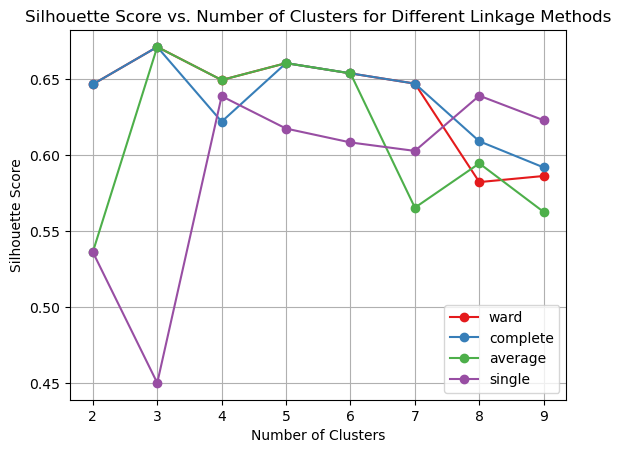

In [17]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
banyak_cluster = 3
AC = AgglomerativeClustering(n_clusters=banyak_cluster, linkage='average')
labels = AC.fit_predict(df_train)

df_train_with_labels = np.column_stack((df_train, labels))

centroids = []
for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)
centroids = np.array(centroids)

traces = []
colors = ['red', 'blue', 'green']

for cluster_label in range(banyak_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    trace = go.Scatter3d(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        z=cluster_data[:, 2],
        mode='markers',
        marker=dict(size=8, color=colors[cluster_label], opacity=0.8),
        name=f'Cluster {cluster_label + 1}'
    )
    traces.append(trace)

centroid_trace = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

traces.append(centroid_trace)

layout = go.Layout(
    title='Hasil Agglomerative Clustering 3D',
    scene=dict(
        xaxis_title='HP',
        yaxis_title='ATK',
        zaxis_title='DEF'
    ),
    showlegend=True
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

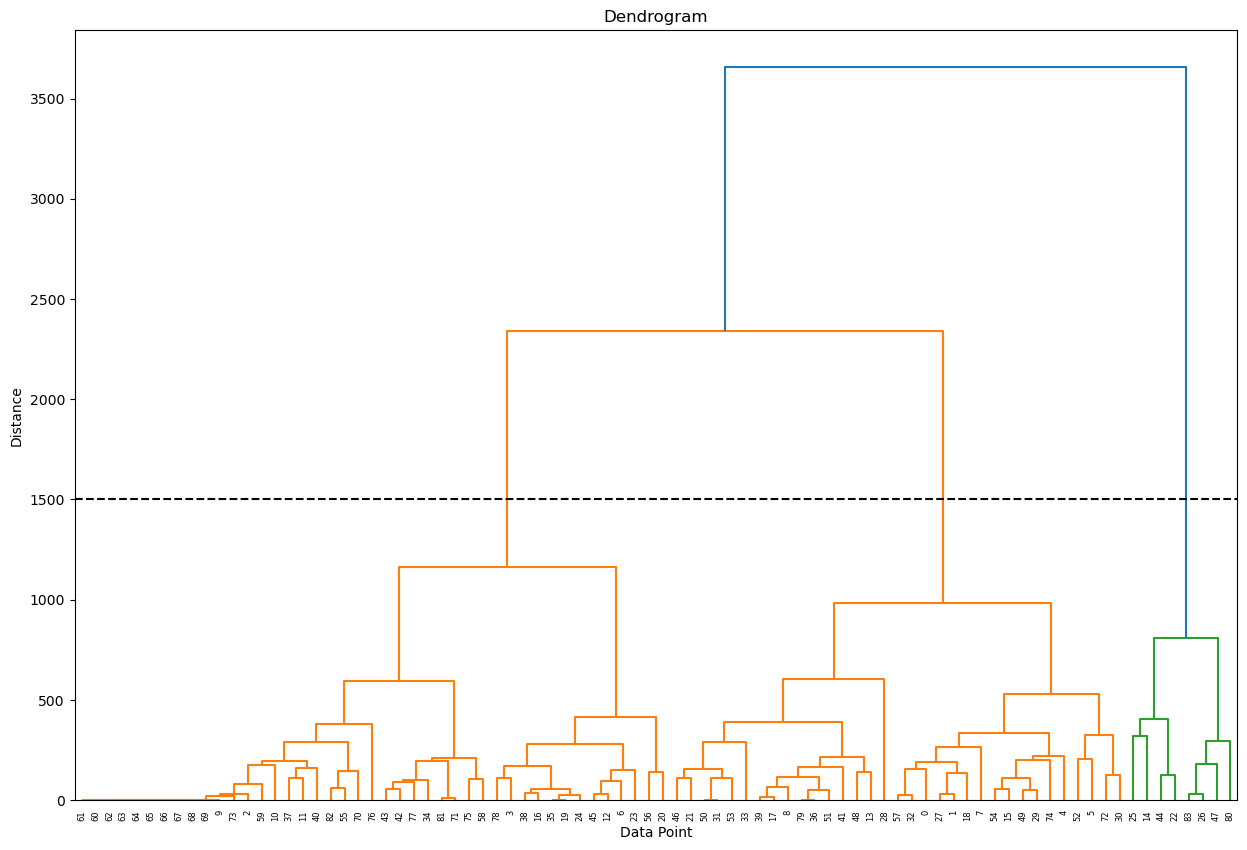

In [19]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(df_train, 'average')


plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.axhline(y=1500, color='black', linestyle='--') # at this point, will divide the data into 3 clusters
plt.show()

### DBSCAN

**Definisi** = Density-Based Spatial Clustering of Applications with Noise (DBSCAN) adalah algoritma dasar untuk pengelompokan berbasis density. DBSCAN juga bisa digunakan untuk meng-*handle* outlier.

![DBSCAN](./assets/DBSCAN.gif)

In [20]:
from sklearn.cluster import DBSCAN

epsilon = np.arange(0.1, 6, 0.1)
min_samples = range(1,26)

sil_avg = []
max_value = (0, 0, 0, -1)  # Inisialisasi nilai_maks dengan nilai negatif silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(df_train)

        # Periksa apakah ada setidaknya dua cluster
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Jumlah cluster dalam label, mengabaikan noise jika ada
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(df_train, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 1.8000000000000003 
min_samples = 1 
number of clusters = 71 
average silhouette score = 0.1986


In [21]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]

db=DBSCAN(eps=best_epsilon, min_samples=best_min_samples, metric='euclidean')
db.fit(df_train)
best_labels = db.labels_

unique_labels = np.unique(best_labels)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'yellow']
cluster_colors = [colors[label % len(colors)] if label != -1 else 'black' for label in best_labels]

# Membuat scatter plot 3D menggunakan iloc
trace = go.Scatter3d(
    x=df_train.iloc[:, 0],  # PCA 1
    y=df_train.iloc[:, 1],  # PCA 2
    z=df_train.iloc[:, 2],  # PCA 3
    mode='markers',
    marker=dict(size=8, color=cluster_colors, opacity=0.8),
    text=[f'Cluster {label}' if label != -1 else 'Outlier' for label in best_labels],
    name='Data Points'
)

# Membuat layout
layout = go.Layout(
    title=f'Hasil DBSCAN Clustering (epsilon={best_epsilon}, min_samples={best_min_samples})',
    scene=dict(
        xaxis_title='HP',
        yaxis_title='ATK',
        zaxis_title='DEF'
    ),
    showlegend=False
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan plot interaktif
fig.show()

### Belajar Analisis Clustering

![hydro](./assets/hydro.png)

In [22]:
# Misalkan kita ingin mengetahui sebaran pengguna vision Hydro

df_hydro = df[df['vision'] == ' Hydro  '] #datanya agak tricky
df_hydro

,character_name,rarity,region,vision,weapon_type,hp_90_90,atk_90_90,def_90_90
6,Barbara,4,Mondstadt,Hydro,Catalyst,9787,159,669
9,Candace,4,Sumeru,Hydro,Polearm,10874,212,682
22,Furina,5,Fontaine,Hydro,Sword,15307,243,695
30,Kamisato Ayato,5,Inazuma,Hydro,Sword,13715,299,769
42,Mona,5,Mondstadt,Hydro,Catalyst,10409,287,653
44,Nilou,5,Sumeru,Hydro,Sword,15184,229,728
47,Neuvillette,5,Fontaine,Hydro,Catalyst,14695,208,576
52,Sangonomiya Kokomi,5,Inazuma,Hydro,Catalyst,13471,234,657
57,Tartaglia,5,Snezhnaya,Hydro,Bow,13103,301,815
68,"Traveler (Aether, Hydro)",5,Unknown,Hydro,Sword,10875,212,683


In [23]:
df_hydro_train = df_train.loc[df_hydro.index]
df_hydro_train

,hp_90_90,atk_90_90,def_90_90
6,9787,159,669
9,10874,212,682
22,15307,243,695
30,13715,299,769
42,10409,287,653
44,15184,229,728
47,14695,208,576
52,13471,234,657
57,13103,301,815
68,10875,212,683


In [24]:
nama_chara = df_hydro['character_name']

trace1 = go.Scatter3d(
    x=df_hydro_train[y_kmeans[df_hydro_train.index] == 0].iloc[:, 0],
    y=df_hydro_train[y_kmeans[df_hydro_train.index] == 0].iloc[:, 1],
    z=df_hydro_train[y_kmeans[df_hydro_train.index] == 0].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    text=nama_chara[y_kmeans[df_hydro_train.index] == 0],
    hoverinfo='text',
    name='Cluster 1'
)

trace2 = go.Scatter3d(
    x=df_hydro_train[y_kmeans[df_hydro_train.index] == 1].iloc[:, 0],
    y=df_hydro_train[y_kmeans[df_hydro_train.index] == 1].iloc[:, 1],
    z=df_hydro_train[y_kmeans[df_hydro_train.index] == 1].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    text=nama_chara[y_kmeans[df_hydro_train.index] == 1],
    hoverinfo='text',
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=df_hydro_train[y_kmeans[df_hydro_train.index] == 2].iloc[:, 0],
    y=df_hydro_train[y_kmeans[df_hydro_train.index] == 2].iloc[:, 1],
    z=df_hydro_train[y_kmeans[df_hydro_train.index] == 2].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    text=nama_chara[y_kmeans[df_hydro_train.index] == 2],
    hoverinfo='text',
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='HP',
        yaxis_title='ATK',
        zaxis_title='DEF'
    ),
    showlegend=True
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()

## Principal Component Analysis

**Definisi** = Teknik statistik yang digunakan untuk **mereduksi dimensi data** dengan mengubah variabel asli menjadi sekumpulan variabel baru

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_train)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["PCA_1", "PCA_2"])  # Menggunakan "PCA_1" dan "PCA_2" karena kita hanya memiliki 2 komponen
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.997 0.003


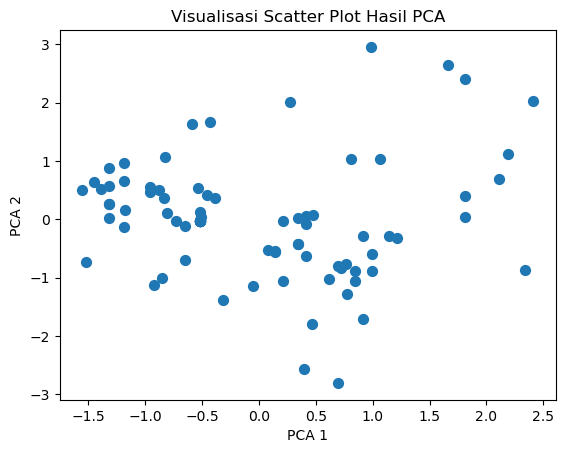

In [26]:
plt.scatter(pca_data["PCA_1"], pca_data["PCA_2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

# Sekian, Terimakasih

![logo_kcv](./assets/kcv-profile.png)